In [1]:
import pandas as pd
import datetime
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
from acoustic_data_science import config, helpers

In [4]:
feather_paths = helpers.get_feather_paths(config.processed_data_path)

transient_totals = []
months = []
data_lengths = []

for feather_path in feather_paths:
    print(feather_path)
    
    df = pd.read_feather(path=feather_path, columns=['short_transient'])

    months.append(feather_path.split('/')[-1][:-len('.feather')])
    transient_totals.append(df['short_transient'].sum())
    data_lengths.append(len(df))

    #df.to_feather(path=f"/Volumes/Data/mphys_project_data/tagged/{feather_path.split('/')[-1]}")
transient_totals

/Users/georgeamccarthy/Documents/workspace/mphys/acoustic-data-science/data/processed/2018_08.feather
/Users/georgeamccarthy/Documents/workspace/mphys/acoustic-data-science/data/processed/2018_09.feather
/Users/georgeamccarthy/Documents/workspace/mphys/acoustic-data-science/data/processed/2018_10.feather
/Users/georgeamccarthy/Documents/workspace/mphys/acoustic-data-science/data/processed/2018_11.feather
/Users/georgeamccarthy/Documents/workspace/mphys/acoustic-data-science/data/processed/2018_12.feather
/Users/georgeamccarthy/Documents/workspace/mphys/acoustic-data-science/data/processed/2019_01.feather
/Users/georgeamccarthy/Documents/workspace/mphys/acoustic-data-science/data/processed/2019_02.feather
/Users/georgeamccarthy/Documents/workspace/mphys/acoustic-data-science/data/processed/2019_03.feather
/Users/georgeamccarthy/Documents/workspace/mphys/acoustic-data-science/data/processed/2019_04.feather
/Users/georgeamccarthy/Documents/workspace/mphys/acoustic-data-science/data/proces

[1815, 1008, 3728, 7743, 20362, 33921, 35417, 46833, 31205, 32967]

In [7]:
from operator import truediv

norm_transient_totals = np.array(list(map(truediv, transient_totals, data_lengths)))*np.mean(data_lengths)
norm_transient_totals

array([ 1146.85484039,   829.74635252,  3164.92619168, 14679.42925945,
       20277.48833144, 31263.35447613, 45223.37266817, 44913.27490876,
       54180.45521402, 32764.62258647])

2021-12-06 16:02:10,753 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2021-12-06 16:02:10,757 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


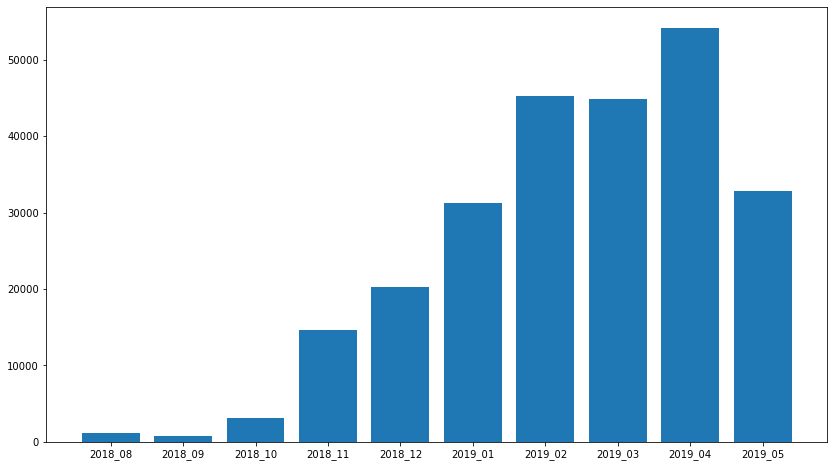

NameError: name 'helper' is not defined

In [8]:
plt.figure(figsize=(14,8))
plt.bar(months, norm_transient_totals)
plt.show()
plt.savefig(helper)